# Sparse Hebbian Learning with Histogram Equalization Homeostasis : testing two different dictionary initalization strategies

1- Dictionary initialized as 2D White Noise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'DICT_INIT'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=2**10, record_each=16, 
            homeo_method='HAP', homeo_params=dict(eta_homeo=0.05, alpha_homeo=0.02),
            learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : /tmp/data_cache/data_data
Data is of shape : (81920, 256) - done in 0.17s.


## White Noise Initialization + Learning

No cache found /tmp/data_cache/DICT_INIT_WHITE_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Learning code... Iteration   0 /   1024 (elapsed time:   0s,  0.0mn)
Iteration  16 /   1024 (elapsed time:  11s,  0.0mn)
Iteration  32 /   1024 (elapsed time:  21s,  0.0mn)
Iteration  48 /   1024 (elapsed time:  30s,  0.0mn)
Iteration  64 /   1024 (elapsed time:  40s,  0.0mn)
Iteration  80 /   1024 (elapsed time:  50s,  0.0mn)
Iteration  96 /   1024 (elapsed time:  59s,  0.0mn)
Iteration  112 /   1024 (elapsed time:  69s,  1.0mn)
Iteration  128 /   1024 (elapsed time:  79s,  1.0mn)
Iteration  144 /   1024 (elapsed time:  89s,  1.0mn)
Iteration  160 /   1024 (elapsed time:  99s,  1.0mn)
Iteration  176 /   1024 (elapsed time:  108s,  1.0mn)
Iteration  192 /   1024 (elapsed time:  119s,  1.0mn)
Iteration  208 /   1024 (elapsed time:  128s,  2.0mn)
Iteration  224 /   1024 (elapsed time:  137s,  2.0mn)
Iteration  240 /   1024 (elapsed time:  147s,  2.0mn)
Iteration 

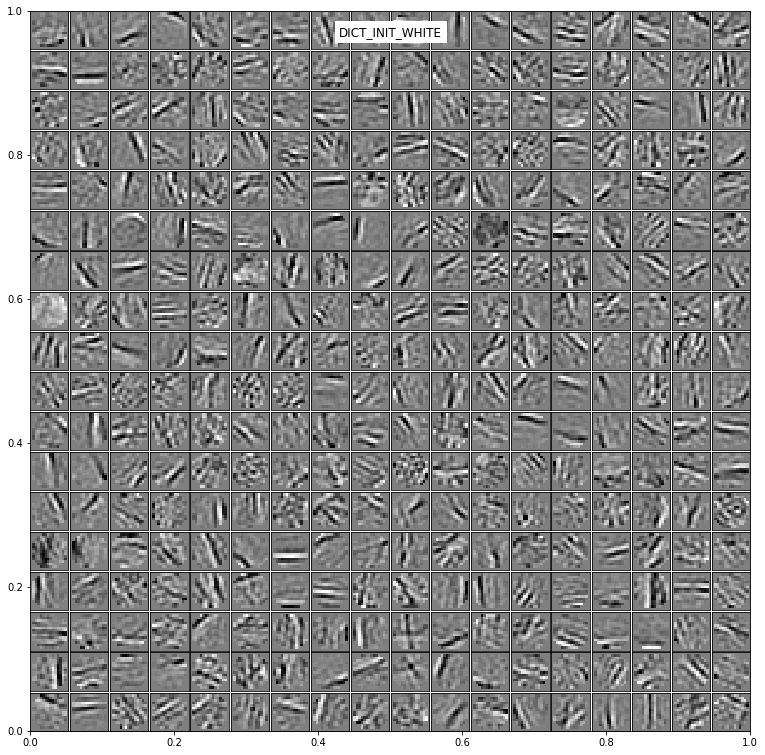

In [4]:
matname = tag + '_WHITE'
shl = SHL(one_over_F=False, **opts)
dico_w = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

## 1/f Noise Initialization + Learning

No cache found /tmp/data_cache/DICT_INIT_OVF_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Learning code... Iteration   0 /   1024 (elapsed time:   1s,  0.0mn)
Iteration  16 /   1024 (elapsed time:  10s,  0.0mn)
Iteration  32 /   1024 (elapsed time:  19s,  0.0mn)
Iteration  48 /   1024 (elapsed time:  29s,  0.0mn)
Iteration  64 /   1024 (elapsed time:  39s,  0.0mn)
Iteration  80 /   1024 (elapsed time:  49s,  0.0mn)
Iteration  96 /   1024 (elapsed time:  58s,  0.0mn)
Iteration  112 /   1024 (elapsed time:  68s,  1.0mn)
Iteration  128 /   1024 (elapsed time:  77s,  1.0mn)
Iteration  144 /   1024 (elapsed time:  87s,  1.0mn)
Iteration  160 /   1024 (elapsed time:  97s,  1.0mn)
Iteration  176 /   1024 (elapsed time:  106s,  1.0mn)
Iteration  192 /   1024 (elapsed time:  116s,  1.0mn)
Iteration  208 /   1024 (elapsed time:  126s,  2.0mn)
Iteration  224 /   1024 (elapsed time:  135s,  2.0mn)
Iteration  240 /   1024 (elapsed time:  146s,  2.0mn)
Iteration  2

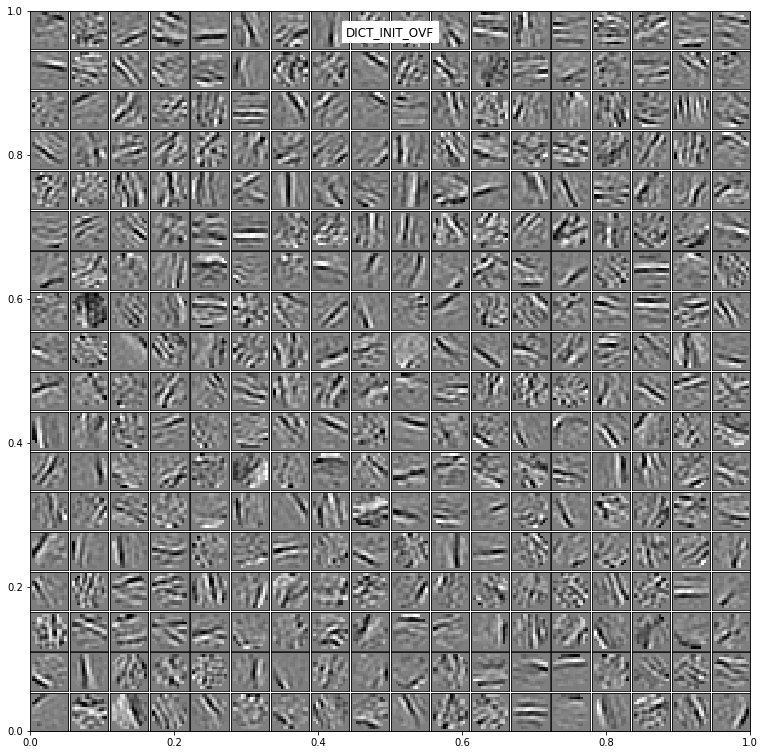

In [5]:
matname = tag + '_OVF'
shl = SHL(one_over_F=True, **opts)
dico_1oF = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

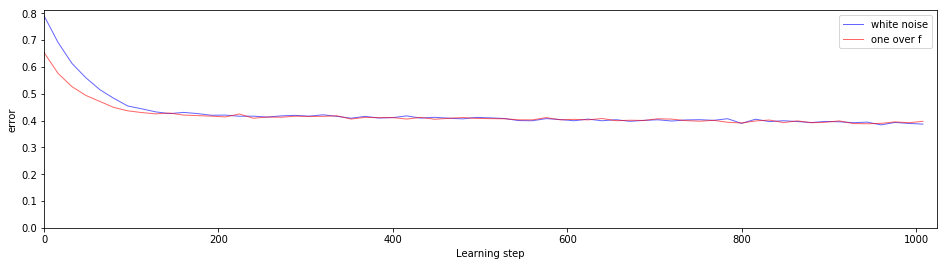

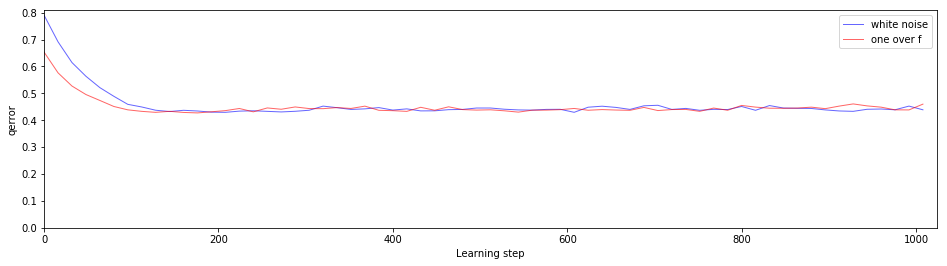

In [6]:
for variable in ['error', 'qerror']:
    fig_error, ax_error = None, None
    fig_error, ax_error = shl.time_plot(dico_w, variable=variable, fig=fig_error, ax=ax_error, color='blue', label='white noise')
    fig_error, ax_error = shl.time_plot(dico_1oF, variable=variable, fig=fig_error, ax=ax_error, color='red', label='one over f')
    #ax_error.set_ylim((0, .65))
    ax_error.legend(loc='best')
    plt.show();